In [1]:
import numpy as np 
import pandas as pd 
import scipy as sc
import re
import sklearn 
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lb
import catboost as cb
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings("ignore")

In [2]:
Carprice_train = pd.read_csv("train.csv")
Carprice_train.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


## Checking all the Nan values from the data frame

In [3]:
Carprice_train.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [4]:
class Data_Insights:
    def __init__(self):
        self.datatype = ""
        
        self.cnt = 0
    def Data_type(self,df):
        for i  in df.columns:
            print("Data type is {} for  Column {}".format(df[i].dtypes,i))
            
            
    def Correct_data_type(self,input_col,df):
        
        if input_col == "Levy":
            df[input_col] =self.Levy(input_col,df)
        elif input_col =="Engine volume":
            df[input_col] = self.Engine(input_col,df)
        elif input_col == "Mileage":
            df[input_col] = self.Mileage(input_col,df)
        return df[input_col]
            
            
    def Levy(self,input_col,df):
        self.lst = []
        for val in df[input_col]:
            val = val.replace("-","0")
            self.lst.append(int(val))

        return self.lst
    
    
    def Engine(self,input_col,df):
        self.lst.clear()
        for val in df[input_col]:
            volu = re.findall("[-+]?\d*\.\d+|\d+",val)
            for j in volu:
                self.lst.append(float(j))
        return self.lst
    
    def Mileage(self,input_col,df):
        self.lst1 = []
        for val in df[input_col]:
            
            val = re.findall("^[0-9]+",val)
            
            for value in val:
                self.lst1.append(int(value))
            
        return self.lst1
        
            
   
        
        

In [5]:
## Changing the Levy, Engine and Mileage values 

Data = Data_Insights()
print(Data.Correct_data_type("Levy",Carprice_train))


0        1399
1        1018
2           0
3         862
4         446
         ... 
19232       0
19233     831
19234     836
19235    1288
19236     753
Name: Levy, Length: 19237, dtype: int64


In [6]:
print(Data.Correct_data_type("Engine volume",Carprice_train))


0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 19237, dtype: float64


In [7]:
print(Data.Correct_data_type("Mileage",Carprice_train))

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 19237, dtype: int64


In [8]:
Carprice_train.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [9]:
Carprice_train["Engine volume"].dtypes

dtype('float64')

In [10]:
Data_analysis = Data_Insights()
Data_analysis.Data_type(Carprice_train)

Data type is int64 for  Column ID
Data type is int64 for  Column Price
Data type is int64 for  Column Levy
Data type is object for  Column Manufacturer
Data type is object for  Column Model
Data type is int64 for  Column Prod. year
Data type is object for  Column Category
Data type is object for  Column Leather interior
Data type is object for  Column Fuel type
Data type is float64 for  Column Engine volume
Data type is int64 for  Column Mileage
Data type is float64 for  Column Cylinders
Data type is object for  Column Gear box type
Data type is object for  Column Drive wheels
Data type is object for  Column Doors
Data type is object for  Column Wheel
Data type is object for  Column Color
Data type is int64 for  Column Airbags


----------------------

## Visualization 

In [11]:
class visual_representation:
    def __init__(self,dataframe,xvalue,yvalue,xlabel,ylabel,title):
        self.dataframe = dataframe
        self.xvalue = xvalue
        self.yvalue  = yvalue
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.title = title
        
    """Creating the different visual charts for understanding"""
    def boxplot_plot(self):
        sns.boxplot(self.dataframe)
        plt.xlabel(self.xlabel);
        plt.ylabel(self.ylabel);
        plt.title(self.title);
        
      
    def countplot_without_percentage_representation(self):
        sns.set_style("darkgrid")
        sns.countplot(x=self.xvalue,data=self.dataframe)
        plt.xlabel(self.xlabel);
        plt.ylabel(self.ylabel);
        plt.title(self.title);
        plt.show()
        
        
        
    def countplot_with_percentage_representation(self):
        sns.set_style("darkgrid")
        ax = sns.countplot(x=self.xvalue,data=self.dataframe)
        total = len(self.dataframe)
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width()
            y = p.get_height()
            ax.annotate(percentage, (x, y),ha='right')
        plt.xlabel(self.xlabel);
        plt.ylabel(self.ylabel);
        plt.title(self.title);
        plt.show()
    
    
    
        
    """Scatter plot to see the multivariate outlier"""
    def scatterplot(self):
        sns.scatterplot(x=self.xvalue,y=self.yvalue,data=self.dataframe)
        plt.xlabel(self.xlabel);
        plt.title(self.title);
        plt.show()
        
        
    def heatmap(self):
        correlation_data = self.dataframe.corr()
        sns.heatmap(correlation_data,annot=True)
        plt.xlabel(self.xlabel);
        plt.title(self.title);
        plt.show()
        
    def violinplot(self):
        sns.violinplot(data=self.dataframe,x=self.xvalue,y=self.yvalue,split=True,inner="quart",linewidth=1,palette={'Yes':"b","No":".85"})
        sns.despine(left=True)
        plt.xlabel(self.xlabel);
        plt.title(self.title);
        plt.show()
        
        
        

        
    

In [12]:
filter_condition = Carprice_train[Carprice_train["Levy"]>0]
# print(filter_condition)

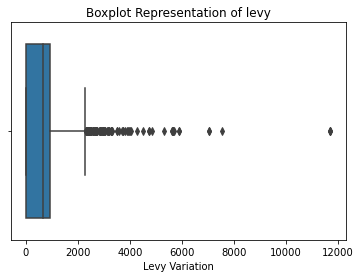

In [13]:
levy_boxplot_visualization = visual_representation(Carprice_train["Levy"],"","","Levy Variation","","Boxplot Representation of levy").boxplot_plot()

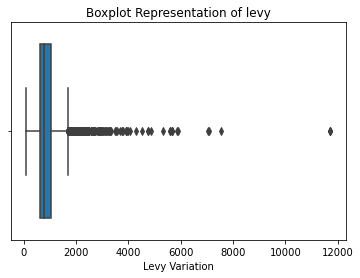

In [14]:
levy_boxplot_visualization_withzero_removal = visual_representation(filter_condition["Levy"],"","","Levy Variation","","Boxplot Representation of levy").boxplot_plot()

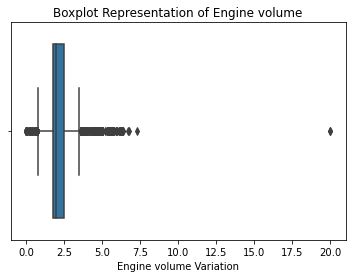

In [15]:
Engine_volume_boxplot_visualization = visual_representation(Carprice_train["Engine volume"],"","","Engine volume Variation","","Boxplot Representation of Engine volume").boxplot_plot()

In [16]:
Data_frame_Car_Price = Carprice_train[[ col for col in Carprice_train.columns if col!="Price" ]+['Price']]

In [17]:
np.mean(Carprice_train["Levy"])

632.5286687113376

In [18]:
np.median(Carprice_train["Levy"])

642.0

In [19]:
Data_frame_Car_Price["Levy"] = Data_frame_Car_Price["Levy"].replace(0,np.median(Data_frame_Car_Price["Levy"]))

In [20]:
Data_frame_Car_Price["Levy"] = Data_frame_Car_Price["Levy"].replace(0,np.mean(Data_frame_Car_Price["Levy"]))

In [21]:
Data_frame_Car_Price.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,45654403,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,13328
1,44731507,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,16621
2,45774419,642.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,8467
3,45769185,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,3607
4,45809263,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,11726


In [22]:
Data_frame_Car_Price["Manufacturer"].dtypes

dtype('O')

In [23]:
class unique_datatype:
    def __init__(self,df):
        self.dataframe = df
        self.lst = []
    def unique_value(self):
        col = self.dataframe.columns
        for i in col:
            if self.dataframe[i].dtypes == "O":
                values = self.dataframe[i].unique
                print("col {} and values {}".format(i,values))

In [24]:
Values = unique_datatype(Data_frame_Car_Price)
Values.unique_value()

col Manufacturer and values <bound method Series.unique of 0                LEXUS
1            CHEVROLET
2                HONDA
3                 FORD
4                HONDA
             ...      
19232    MERCEDES-BENZ
19233          HYUNDAI
19234          HYUNDAI
19235        CHEVROLET
19236          HYUNDAI
Name: Manufacturer, Length: 19237, dtype: object>
col Model and values <bound method Series.unique of 0         RX 450
1        Equinox
2            FIT
3         Escape
4            FIT
          ...   
19232    CLK 200
19233     Sonata
19234     Tucson
19235    Captiva
19236     Sonata
Name: Model, Length: 19237, dtype: object>
col Category and values <bound method Series.unique of 0             Jeep
1             Jeep
2        Hatchback
3             Jeep
4        Hatchback
           ...    
19232        Coupe
19233        Sedan
19234         Jeep
19235         Jeep
19236        Sedan
Name: Category, Length: 19237, dtype: object>
col Leather interior and values <bound method 

In [25]:
class label_encoding:
    
    def __init__(self):
        self.lst = []
    
    def label_encoding(self,data_frame,index_name):
        val = data_frame[index_name].unique()
        for i in range(0,len(val)):
            data_frame[index_name] = data_frame[index_name].replace(val[i],i)
        return data_frame[index_name]

In [26]:
Label_encoding = label_encoding()
Label_encoding.label_encoding(Data_frame_Car_Price,"Color")

0        0
1        1
2        1
3        2
4        0
        ..
19232    0
19233    6
19234    3
19235    1
19236    2
Name: Color, Length: 19237, dtype: int64

In [27]:
Label_encoding.label_encoding(Data_frame_Car_Price,"Wheel")

0        0
1        0
2        1
3        0
4        0
        ..
19232    0
19233    0
19234    0
19235    0
19236    0
Name: Wheel, Length: 19237, dtype: int64

In [28]:
Label_encoding.label_encoding(Data_frame_Car_Price,"Doors")
Label_encoding.label_encoding(Data_frame_Car_Price,"Drive wheels")
Label_encoding.label_encoding(Data_frame_Car_Price,'Gear box type')

0        0
1        1
2        2
3        0
4        0
        ..
19232    3
19233    1
19234    0
19235    0
19236    0
Name: Gear box type, Length: 19237, dtype: int64

In [29]:
Data_frame_Car_Price.columns

Index(['ID', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Price'],
      dtype='object')

In [30]:
Label_encoding.label_encoding(Data_frame_Car_Price,'Fuel type')
Label_encoding.label_encoding(Data_frame_Car_Price,'Leather interior')
Label_encoding.label_encoding(Data_frame_Car_Price,'Category')


0        0
1        0
2        1
3        0
4        1
        ..
19232    6
19233    2
19234    0
19235    0
19236    2
Name: Category, Length: 19237, dtype: int64

In [31]:
Label_encoding.label_encoding(Data_frame_Car_Price,'Manufacturer')
Label_encoding.label_encoding(Data_frame_Car_Price,'Model')

0          0
1          1
2          2
3          3
4          2
        ... 
19232    383
19233      6
19234     42
19235     44
19236      6
Name: Model, Length: 19237, dtype: int64

In [32]:
Data_frame_Car_Price.head(20)

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,45654403,1399.0,0,0,2010,0,0,0,3.5,186005,6.0,0,0,0,0,0,12,13328
1,44731507,1018.0,1,1,2011,0,1,1,3.0,192000,6.0,1,0,0,0,1,8,16621
2,45774419,642.0,2,2,2006,1,1,1,1.3,200000,4.0,2,1,0,1,1,2,8467
3,45769185,862.0,3,3,2011,0,0,0,2.5,168966,4.0,0,0,0,0,2,0,3607
4,45809263,446.0,2,2,2014,1,0,1,1.3,91901,4.0,0,1,0,0,0,4,11726
5,45802912,891.0,4,4,2016,0,0,2,2.0,160931,4.0,0,1,0,0,2,4,39493
6,45656768,761.0,5,5,2010,1,0,0,1.8,258909,4.0,0,1,0,0,2,12,1803
7,45816158,751.0,4,6,2013,2,0,1,2.4,216118,4.0,0,1,0,0,3,12,549
8,45641395,394.0,5,7,2014,2,0,0,2.5,398069,4.0,0,1,0,0,1,12,1098
9,45756839,642.0,0,8,2007,0,0,1,3.5,128500,6.0,0,0,0,0,0,12,26657


In [33]:
ID = Data_frame_Car_Price["ID"]


In [34]:
 Data_frame_Car_Price.drop(["ID"],axis = 1,inplace = True)

In [35]:
Data_frame_Car_Price

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,1399.0,0,0,2010,0,0,0,3.5,186005,6.0,0,0,0,0,0,12,13328
1,1018.0,1,1,2011,0,1,1,3.0,192000,6.0,1,0,0,0,1,8,16621
2,642.0,2,2,2006,1,1,1,1.3,200000,4.0,2,1,0,1,1,2,8467
3,862.0,3,3,2011,0,0,0,2.5,168966,4.0,0,0,0,0,2,0,3607
4,446.0,2,2,2014,1,0,1,1.3,91901,4.0,0,1,0,0,0,4,11726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,642.0,6,383,1999,6,0,3,2.0,300000,4.0,3,2,1,0,0,5,8467
19233,831.0,4,6,2011,2,0,1,2.4,161600,4.0,1,1,0,0,6,8,15681
19234,836.0,4,42,2010,0,0,2,2.0,116365,4.0,0,1,0,0,3,4,26108
19235,1288.0,1,44,2007,0,0,2,2.0,51258,4.0,0,1,0,0,1,4,5331


In [36]:
Data_frame_Car_Price["Model"].dtype

dtype('int64')

In [37]:
#  Data_frame_Car_Price.drop(["Manufacturer","Model"],axis = 1,inplace = True)

In [38]:
X_fold_nn = Data_frame_Car_Price.iloc[:,:-1].values
y_fold_nn = Data_frame_Car_Price.iloc[:,-1].values
kf = KFold(n_splits = 7,random_state = 42,shuffle = True)
for train_index,test_index in kf.split(X_fold_nn):
    X_train_fold_nn,X_test_fold_nn = X_fold_nn[train_index],X_fold_nn[test_index]
    y_train_fold_nn,y_test_fold_nn = y_fold_nn[train_index],y_fold_nn[test_index]

In [39]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=100, n_jobs=2)
regr.fit(X_train_fold_nn,y_train_fold_nn)

RandomForestRegressor(n_jobs=2)

In [40]:
y_pred_rr = regr.predict(X_test_fold_nn)

In [41]:
error = mean_squared_error(y_pred_rr,y_test_fold_nn)

In [42]:
print(error)

68485379192.48166


In [43]:
import xgboost as xgb
regressor_xgb = xgb.XGBRegressor()
regressor_xgb.fit(X_train_fold_nn,y_train_fold_nn)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
y_pred_xgb = regressor_xgb.predict(X_test_fold_nn)
error_xgb = mean_squared_error(y_pred_xgb,y_test_fold_nn)
print(error_xgb)

240414987637.15375


In [45]:
import catboost as cb
regressor_cb = cb.CatBoostRegressor()
regressor_cb.fit(X_train_fold_nn,y_train_fold_nn)
y_pred_cb = regressor_cb.predict(X_test_fold_nn)
error_cb = mean_squared_error(y_pred_cb,y_test_fold_nn)

Learning rate set to 0.064278
0:	learn: 203104.1545466	total: 175ms	remaining: 2m 54s
1:	learn: 199864.9259351	total: 186ms	remaining: 1m 32s
2:	learn: 196679.8384224	total: 195ms	remaining: 1m 4s
3:	learn: 193547.5569392	total: 203ms	remaining: 50.5s
4:	learn: 190456.5260566	total: 207ms	remaining: 41.3s
5:	learn: 187423.8594556	total: 212ms	remaining: 35s
6:	learn: 184439.9621867	total: 216ms	remaining: 30.6s
7:	learn: 181508.5422717	total: 219ms	remaining: 27.2s
8:	learn: 178620.1612225	total: 223ms	remaining: 24.6s
9:	learn: 175775.6570676	total: 227ms	remaining: 22.4s
10:	learn: 173555.5096123	total: 230ms	remaining: 20.7s
11:	learn: 170796.2030362	total: 233ms	remaining: 19.2s
12:	learn: 168085.0714352	total: 237ms	remaining: 18s
13:	learn: 165412.9648753	total: 241ms	remaining: 17s
14:	learn: 162787.0039398	total: 244ms	remaining: 16s
15:	learn: 160193.6034996	total: 248ms	remaining: 15.3s
16:	learn: 157649.4621355	total: 252ms	remaining: 14.6s
17:	learn: 155148.6898877	total: 2

In [46]:
error_cb

122066342671.18579

In [47]:
df_test = pd.read_csv("test.csv")

In [48]:
class Test_Prediction(Data_Insights,label_encoding):
    def __init__(self,dataframe):
        self.dataframe = dataframe
    def Test_prediction(self):
        Data_Imp=Data_Insights() 
        Data_Imp.Correct_data_type("Levy",self.dataframe)
        Data_Imp.Correct_data_type("Engine volume",self.dataframe)
        Data_Imp.Correct_data_type("Mileage",self.dataframe)
        self.dataframe["Levy"] = self.dataframe["Levy"].replace(0,np.median(self.dataframe["Levy"]))
        Label_encoding.label_encoding(self.dataframe,"Color")
        Label_encoding.label_encoding(self.dataframe,"Wheel")
        Label_encoding.label_encoding(self.dataframe,"Doors")
        Label_encoding.label_encoding(self.dataframe,"Drive wheels")
        Label_encoding.label_encoding(self.dataframe,'Gear box type')
        Label_encoding.label_encoding(self.dataframe,'Fuel type')
        Label_encoding.label_encoding(self.dataframe,'Leather interior')
        Label_encoding.label_encoding(self.dataframe,'Category')
        Label_encoding.label_encoding(self.dataframe,'Manufacturer')
        Label_encoding.label_encoding(self.dataframe,'Model')
        
        return self.dataframe
        

In [49]:
Test_Prediction = Test_Prediction(df_test)
test_data = Test_Prediction.Test_prediction()

In [50]:
test_data[:-1]

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,645.0,0,0,2012,0,0,0,2.0,0,4,0,0,0,0,0,10,NaN
1,45784798,645.0,1,1,2012,1,1,1,2.4,26000,4,1,0,1,0,0,10,NaN
2,45800257,645.0,2,2,2005,1,0,1,1.5,168000,4,2,0,1,1,1,8,NaN
3,45797981,975.0,3,3,2012,2,1,1,3.2,143000,6,2,1,1,0,2,12,NaN
4,45814303,645.0,4,4,1993,0,0,1,1.6,200000,4,0,0,1,0,3,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8239,45787008,645.0,9,10,2011,1,1,1,1.8,283000,4,2,0,1,0,5,4,NaN
8240,44824410,1357.0,14,993,2004,4,0,1,1.6,164000,4,0,0,1,0,2,6,NaN
8241,45682346,645.0,5,994,2012,1,1,1,2.8,156000,4,1,0,1,0,3,6,NaN
8242,45649860,1646.0,6,6,2015,2,1,1,4.6,102907,8,2,1,1,0,3,0,NaN


In [51]:
ID_test = test_data["ID"]

In [52]:
test_data.drop(["ID"],axis = 1)

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,645.0,0,0,2012,0,0,0,2.0,0,4,0,0,0,0,0,10,NaN
1,645.0,1,1,2012,1,1,1,2.4,26000,4,1,0,1,0,0,10,NaN
2,645.0,2,2,2005,1,0,1,1.5,168000,4,2,0,1,1,1,8,NaN
3,975.0,3,3,2012,2,1,1,3.2,143000,6,2,1,1,0,2,12,NaN
4,645.0,4,4,1993,0,0,1,1.6,200000,4,0,0,1,0,3,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,1357.0,14,993,2004,4,0,1,1.6,164000,4,0,0,1,0,2,6,NaN
8241,645.0,5,994,2012,1,1,1,2.8,156000,4,1,0,1,0,3,6,NaN
8242,1646.0,6,6,2015,2,1,1,4.6,102907,8,2,1,1,0,3,0,NaN
8243,784.0,9,23,2017,0,1,1,1.5,3000,4,2,0,1,0,10,4,NaN


In [53]:
test_data.drop(["ID","Price"],axis = 1,inplace = True)

In [54]:
test_data

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,645.0,0,0,2012,0,0,0,2.0,0,4,0,0,0,0,0,10
1,645.0,1,1,2012,1,1,1,2.4,26000,4,1,0,1,0,0,10
2,645.0,2,2,2005,1,0,1,1.5,168000,4,2,0,1,1,1,8
3,975.0,3,3,2012,2,1,1,3.2,143000,6,2,1,1,0,2,12
4,645.0,4,4,1993,0,0,1,1.6,200000,4,0,0,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,1357.0,14,993,2004,4,0,1,1.6,164000,4,0,0,1,0,2,6
8241,645.0,5,994,2012,1,1,1,2.8,156000,4,1,0,1,0,3,6
8242,1646.0,6,6,2015,2,1,1,4.6,102907,8,2,1,1,0,3,0
8243,784.0,9,23,2017,0,1,1,1.5,3000,4,2,0,1,0,10,4


In [55]:
test_data

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,645.0,0,0,2012,0,0,0,2.0,0,4,0,0,0,0,0,10
1,645.0,1,1,2012,1,1,1,2.4,26000,4,1,0,1,0,0,10
2,645.0,2,2,2005,1,0,1,1.5,168000,4,2,0,1,1,1,8
3,975.0,3,3,2012,2,1,1,3.2,143000,6,2,1,1,0,2,12
4,645.0,4,4,1993,0,0,1,1.6,200000,4,0,0,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,1357.0,14,993,2004,4,0,1,1.6,164000,4,0,0,1,0,2,6
8241,645.0,5,994,2012,1,1,1,2.8,156000,4,1,0,1,0,3,6
8242,1646.0,6,6,2015,2,1,1,4.6,102907,8,2,1,1,0,3,0
8243,784.0,9,23,2017,0,1,1,1.5,3000,4,2,0,1,0,10,4


In [56]:
y_pred_xgb_up = regr.predict(test_data.iloc[:,:].values)

---------------

In [57]:
y_pred_xgb_up = regressor_xgb.predict(test_data.iloc[:,:].values)

In [58]:
print(y_pred_xgb_up)

[38971.273   6536.8535  3616.496  ... 19933.656  47437.26   46635.164 ]


In [59]:
type(y_pred_xgb_up)

numpy.ndarray

In [60]:
Output = pd.DataFrame()
Output["Price"]=pd.Series(y_pred_xgb_up )

In [61]:
Output["Price"] = Output["Price"].abs()

In [62]:
Output.to_csv("submission2.csv",index=False)

In [63]:
submission_df = pd.DataFrame(y_pred_xgb_up,columns = ["Price"])

In [81]:
submission_df.to_csv('my_submission_file.csv', index=False)

-------------------------

### Exp 2

### Apply before label encoding 

In [64]:
Data_frame_Car_Price

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,1399.0,0,0,2010,0,0,0,3.5,186005,6.0,0,0,0,0,0,12,13328
1,1018.0,1,1,2011,0,1,1,3.0,192000,6.0,1,0,0,0,1,8,16621
2,642.0,2,2,2006,1,1,1,1.3,200000,4.0,2,1,0,1,1,2,8467
3,862.0,3,3,2011,0,0,0,2.5,168966,4.0,0,0,0,0,2,0,3607
4,446.0,2,2,2014,1,0,1,1.3,91901,4.0,0,1,0,0,0,4,11726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,642.0,6,383,1999,6,0,3,2.0,300000,4.0,3,2,1,0,0,5,8467
19233,831.0,4,6,2011,2,0,1,2.4,161600,4.0,1,1,0,0,6,8,15681
19234,836.0,4,42,2010,0,0,2,2.0,116365,4.0,0,1,0,0,3,4,26108
19235,1288.0,1,44,2007,0,0,2,2.0,51258,4.0,0,1,0,0,1,4,5331


In [65]:
 class col_modification:
        def __init__(self,df):
            self.dataframe = df
        def data_varification(self):
            val = self.dataframe.columns
            for i in val:
                if self.dataframe[i].dtype=="O":
                    self.dataframe.drop([i],axis = 1,inplace = True)
            return self.dataframe

In [66]:
Columns = col_modification(Data_frame_Car_Price)
Columns.data_varification()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,1399.0,0,0,2010,0,0,0,3.5,186005,6.0,0,0,0,0,0,12,13328
1,1018.0,1,1,2011,0,1,1,3.0,192000,6.0,1,0,0,0,1,8,16621
2,642.0,2,2,2006,1,1,1,1.3,200000,4.0,2,1,0,1,1,2,8467
3,862.0,3,3,2011,0,0,0,2.5,168966,4.0,0,0,0,0,2,0,3607
4,446.0,2,2,2014,1,0,1,1.3,91901,4.0,0,1,0,0,0,4,11726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,642.0,6,383,1999,6,0,3,2.0,300000,4.0,3,2,1,0,0,5,8467
19233,831.0,4,6,2011,2,0,1,2.4,161600,4.0,1,1,0,0,6,8,15681
19234,836.0,4,42,2010,0,0,2,2.0,116365,4.0,0,1,0,0,3,4,26108
19235,1288.0,1,44,2007,0,0,2,2.0,51258,4.0,0,1,0,0,1,4,5331


In [67]:
Data_frame_Car_Price

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,1399.0,0,0,2010,0,0,0,3.5,186005,6.0,0,0,0,0,0,12,13328
1,1018.0,1,1,2011,0,1,1,3.0,192000,6.0,1,0,0,0,1,8,16621
2,642.0,2,2,2006,1,1,1,1.3,200000,4.0,2,1,0,1,1,2,8467
3,862.0,3,3,2011,0,0,0,2.5,168966,4.0,0,0,0,0,2,0,3607
4,446.0,2,2,2014,1,0,1,1.3,91901,4.0,0,1,0,0,0,4,11726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,642.0,6,383,1999,6,0,3,2.0,300000,4.0,3,2,1,0,0,5,8467
19233,831.0,4,6,2011,2,0,1,2.4,161600,4.0,1,1,0,0,6,8,15681
19234,836.0,4,42,2010,0,0,2,2.0,116365,4.0,0,1,0,0,3,4,26108
19235,1288.0,1,44,2007,0,0,2,2.0,51258,4.0,0,1,0,0,1,4,5331


In [46]:
# Data_frame_Car_Price.drop(["ID","Prod. year"],axis=1 ,inplace = True)

In [69]:
Data_frame_Car_Price

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,1399.0,0,0,2010,0,0,0,3.5,186005,6.0,0,0,0,0,0,12,13328
1,1018.0,1,1,2011,0,1,1,3.0,192000,6.0,1,0,0,0,1,8,16621
2,642.0,2,2,2006,1,1,1,1.3,200000,4.0,2,1,0,1,1,2,8467
3,862.0,3,3,2011,0,0,0,2.5,168966,4.0,0,0,0,0,2,0,3607
4,446.0,2,2,2014,1,0,1,1.3,91901,4.0,0,1,0,0,0,4,11726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,642.0,6,383,1999,6,0,3,2.0,300000,4.0,3,2,1,0,0,5,8467
19233,831.0,4,6,2011,2,0,1,2.4,161600,4.0,1,1,0,0,6,8,15681
19234,836.0,4,42,2010,0,0,2,2.0,116365,4.0,0,1,0,0,3,4,26108
19235,1288.0,1,44,2007,0,0,2,2.0,51258,4.0,0,1,0,0,1,4,5331


In [70]:
X_fold_nn = Data_frame_Car_Price.iloc[:,:-1].values
y_fold_nn = Data_frame_Car_Price.iloc[:,-1].values
kf = KFold(n_splits = 7,random_state = 42,shuffle = True)
for train_index,test_index in kf.split(X_fold_nn):
    X_train_fold_nn,X_test_fold_nn = X_fold_nn[train_index],X_fold_nn[test_index]
    y_train_fold_nn,y_test_fold_nn = y_fold_nn[train_index],y_fold_nn[test_index]

In [71]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=100, n_jobs=2)
regr.fit(X_train_fold_nn,y_train_fold_nn)

RandomForestRegressor(n_jobs=2)

In [72]:
error2 = mean_squared_error(y_pred_rr,y_test_fold_nn)

In [73]:
print(error2)

89974259959.58307


In [74]:
error1 = mean_squared_error(y_pred_rr,y_test_fold_nn)

In [75]:
print(error1)

89974259959.58307


In [76]:
import xgboost as xgb
regressor_xgb = xgb.XGBRegressor()
regressor_xgb.fit(X_train_fold_nn,y_train_fold_nn)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
y_pred_xgb = regressor_xgb.predict(X_test_fold_nn)
error_xgb = mean_squared_error(y_pred_xgb,y_test_fold_nn)
print(error_xgb)

240414987637.15375


In [78]:
y_pred_xgb = regressor_xgb.predict(X_test_fold_nn)
error_xgb = mean_squared_error(y_pred_xgb,y_test_fold_nn)
print(error_xgb)

240414987637.15375


In [79]:
df_test = pd.read_csv("test.csv")

In [80]:
class Test_Prediction_exp2(Data_Insights,col_modification):
    def __init__(self,dataframe):
        self.dataframe = dataframe
    def Test_prediction(self):
        Data_Imp=Data_Insights() 
        Data_Imp.Correct_data_type("Levy",self.dataframe)
        Data_Imp.Correct_data_type("Engine volume",self.dataframe)
        Data_Imp.Correct_data_type("Mileage",self.dataframe)
        self.dataframe["Levy"] = self.dataframe["Levy"].replace(0,np.median(self.dataframe["Levy"]))
        Columns = col_modification(self.dataframe)
        Columns.data_varification()
        
                
        return self.dataframe
        

In [81]:
Test_Prediction = Test_Prediction_exp2(df_test)
test_data = Test_Prediction.Test_prediction()

In [82]:
print(test_data)

            ID    Levy  Prod. year  Engine volume  Mileage  Cylinders  \
0     44020629   645.0        2012            2.0        0          4   
1     45784798   645.0        2012            2.4    26000          4   
2     45800257   645.0        2005            1.5   168000          4   
3     45797981   975.0        2012            3.2   143000          6   
4     45814303   645.0        1993            1.6   200000          4   
...        ...     ...         ...            ...      ...        ...   
8240  44824410  1357.0        2004            1.6   164000          4   
8241  45682346   645.0        2012            2.8   156000          4   
8242  45649860  1646.0        2015            4.6   102907          8   
8243  45809706   784.0        2017            1.5     3000          4   
8244  45813163   448.0        2012            1.3   321269          4   

      Airbags  Price  
0          10    NaN  
1          10    NaN  
2           8    NaN  
3          12    NaN  
4       

In [84]:
# test_data.drop(["ID","Price"],axis = 1,inplace = True)
# y_pred_xgb_up = regressor_xgb.predict(test_data.iloc[:,:].values)

In [262]:
Output = pd.DataFrame()
Output["Price"]=pd.Series(y_pred_xgb_up )

In [263]:
Output["Price"] = Output["Price"].abs()
Output.to_csv("submission3.csv",index=False)

----------------

------

### Exp 4

In [62]:
Carprice_train = pd.read_csv("train.csv")
Carprice_train.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [63]:
## Changing the Levy, Engine and Mileage values 

Data = Data_Insights()
print(Data.Correct_data_type("Levy",Carprice_train))




0        1399
1        1018
2           0
3         862
4         446
         ... 
19232       0
19233     831
19234     836
19235    1288
19236     753
Name: Levy, Length: 19237, dtype: int64


In [64]:
print(Data.Correct_data_type("Engine volume",Carprice_train))


0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 19237, dtype: float64


In [65]:
print(Data.Correct_data_type("Mileage",Carprice_train))

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 19237, dtype: int64


In [66]:
Carprice_train["Levy"] = Carprice_train["Levy"].replace(0,np.median(Carprice_train["Levy"]))

In [67]:

sum(Carprice_train.duplicated(subset = 'ID')) == 0

False

In [68]:
Carprice_train[Carprice_train.duplicated("ID")]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
425,45815372,7840,642.0,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2.0,180003,4.0,Manual,Rear,04-May,Left wheel,Black,4
1581,45815363,8781,642.0,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
1697,45732125,18503,642.0,TOYOTA,Prius,2010,Sedan,No,Petrol,1.8,162000,4.0,Automatic,Front,04-May,Left wheel,Grey,12
1972,45507765,20385,642.0,MERCEDES-BENZ,CLS 500,2005,Sedan,Yes,Petrol,5.0,230000,8.0,Tiptronic,Rear,04-May,Left wheel,Silver,10
2131,45815363,8781,642.0,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,45815465,2352,1273.0,LEXUS,IS 350,2015,Sedan,Yes,Petrol,3.5,80856,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19137,45810466,15125,642.0,CHEVROLET,Orlando,2012,Jeep,Yes,Diesel,2.0,156834,4.0,Automatic,Front,04-May,Left wheel,Golden,4
19200,45725908,36065,640.0,MERCEDES-BENZ,CLA 250 AMG,2013,Sedan,Yes,Petrol,2.0,68000,4.0,Tiptronic,Front,04-May,Left wheel,Red,12
19203,45761487,13485,645.0,TOYOTA,Prius,2011,Sedan,No,Hybrid,1.8,281600,6.0,Automatic,Front,04-May,Left wheel,Grey,8


In [69]:
Carprice_train[Carprice_train["ID"]==45815372]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
330,45815372,7840,642.0,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2.0,180003,4.0,Manual,Rear,04-May,Left wheel,Black,4
425,45815372,7840,642.0,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2.0,180003,4.0,Manual,Rear,04-May,Left wheel,Black,4
7138,45815372,7840,642.0,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2.0,180003,4.0,Manual,Rear,04-May,Left wheel,Black,4
7796,45815372,7840,642.0,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2.0,180003,4.0,Manual,Rear,04-May,Left wheel,Black,4
9965,45815372,7840,642.0,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2.0,180003,4.0,Manual,Rear,04-May,Left wheel,Black,4
10338,45815372,7840,642.0,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2.0,180003,4.0,Manual,Rear,04-May,Left wheel,Black,4


In [70]:
Carprice_train.drop_duplicates(subset ="ID",
                     keep = False, inplace = True)

In [71]:
Carprice_train

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
2,45774419,8467,642.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931,4.0,Automatic,Front,04-May,Left wheel,White,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,642.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [76]:
Data_frame = Carprice_train[[i for i in Carprice_train.columns if i!="Price"]+["Price"]]

In [77]:
Data_frame

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,45654403,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,13328
2,45774419,642.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,8467
3,45769185,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,3607
4,45809263,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,11726
5,45802912,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931,4.0,Automatic,Front,04-May,Left wheel,White,4,39493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,642.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,8467
19233,45778856,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,15681
19234,45804997,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4,26108
19235,45793526,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4,5331


In [78]:
Data_frame[Data_frame.duplicated("ID")]

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price


In [79]:
Data_frame.drop(["ID","Model","Manufacturer","Gear box type","Drive wheels","Doors","Wheel","Color"],axis =1,inplace= True )

In [90]:
Data_frame[Data_frame["Levy"] == "-"]

,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Airbags,Price


In [80]:
Data_frame

,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Airbags,Price
0,1399.0,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,12,13328
2,642.0,2006,Hatchback,No,Petrol,1.3,200000,4.0,2,8467
3,862.0,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,0,3607
4,446.0,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,4,11726
5,891.0,2016,Jeep,Yes,Diesel,2.0,160931,4.0,4,39493
...,...,...,...,...,...,...,...,...,...,...
19232,642.0,1999,Coupe,Yes,CNG,2.0,300000,4.0,5,8467
19233,831.0,2011,Sedan,Yes,Petrol,2.4,161600,4.0,8,15681
19234,836.0,2010,Jeep,Yes,Diesel,2.0,116365,4.0,4,26108
19235,1288.0,2007,Jeep,Yes,Diesel,2.0,51258,4.0,4,5331


In [81]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Data_frame["Category"] = label_encoder.fit_transform(Data_frame["Category"])
Data_frame["Leather interior"] = label_encoder.fit_transform(Data_frame["Leather interior"])
Data_frame["Fuel type"] = label_encoder.fit_transform(Data_frame["Fuel type"])

In [82]:
Data_analysis = Data_Insights()
Data_analysis.Data_type(Data_frame)

Data type is float64 for  Column Levy
Data type is int64 for  Column Prod. year
Data type is int32 for  Column Category
Data type is int32 for  Column Leather interior
Data type is int32 for  Column Fuel type
Data type is float64 for  Column Engine volume
Data type is int64 for  Column Mileage
Data type is float64 for  Column Cylinders
Data type is int64 for  Column Airbags
Data type is int64 for  Column Price


In [83]:
X_fold_nn = Data_frame.iloc[:,:-1].values
y_fold_nn = Data_frame.iloc[:,-1].values
kf = KFold(n_splits = 7,random_state = 42,shuffle = True)
for train_index,test_index in kf.split(X_fold_nn):
    X_train_fold_nn,X_test_fold_nn = X_fold_nn[train_index],X_fold_nn[test_index]
    y_train_fold_nn,y_test_fold_nn = y_fold_nn[train_index],y_fold_nn[test_index]

In [84]:
import xgboost as xgb
regressor_xgb = xgb.XGBRegressor()
regressor_xgb.fit(X_train_fold_nn,y_train_fold_nn)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
y_pred_xgb = regressor_xgb.predict(X_test_fold_nn)
error_xgb = mean_squared_error(y_pred_xgb,y_test_fold_nn)
print(error_xgb)

144929382.77374467


In [96]:
df_test_new = pd.read_csv("test.csv")

In [97]:
df_test_new[df_test_new.duplicated("ID")]

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
1137,45815375,-,LEXUS,RX 300,2002,Jeep,Yes,Petrol,3.0 Turbo,201000 km,6,Automatic,4x4,04-May,Left wheel,Silver,8,NaN
1157,45813894,1172,MERCEDES-BENZ,E 350,2011,Sedan,Yes,Petrol,3.5,121245 km,6,Automatic,Rear,04-May,Left wheel,Silver,12,NaN
1931,45815239,1053,MERCEDES-BENZ,GLK 350,2014,Jeep,Yes,Petrol,3.5,156768 km,6,Automatic,4x4,04-May,Left wheel,White,12,NaN
2076,45793611,1341,FORD,Focus,2006,Hatchback,No,Petrol,1.8,0 km,4,Manual,Front,04-May,Left wheel,Sky blue,8,NaN
2197,45815359,1493,LEXUS,RX 350,2016,Jeep,Yes,Petrol,3.5,65981 km,6,Automatic,Front,04-May,Left wheel,Black,12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7916,45815355,1172,LEXUS,IS 350,2011,Sedan,Yes,Petrol,3.5,259066 km,6,Automatic,4x4,04-May,Left wheel,Silver,12,NaN
8005,45681968,-,MERCEDES-BENZ,CLS 500,2005,Sedan,Yes,CNG,5,194000 km,8,Automatic,Rear,04-May,Left wheel,Black,8,NaN
8011,45815373,-,INFINITI,EX37,2012,Hatchback,Yes,Petrol,3.3,52000 km,6,Automatic,4x4,04-May,Left wheel,Black,2,NaN
8148,45815386,1363,LEXUS,GX 460,2012,Jeep,Yes,Petrol,4.6,150909 km,8,Automatic,4x4,04-May,Left wheel,Black,12,NaN


In [98]:
df_test_new.drop(["ID","Model","Manufacturer","Gear box type","Drive wheels","Doors","Wheel","Color"],axis =1,inplace= True )

In [99]:
df_test_new["Category"] = label_encoder.fit_transform(df_test_new["Category"])
df_test_new["Leather interior"] = label_encoder.fit_transform(df_test_new["Leather interior"])
df_test_new["Fuel type"] = label_encoder.fit_transform(df_test_new["Fuel type"])

In [100]:
df_test_new[df_test_new["Levy"] == "-"]

,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Airbags,Price
0,-,2012,3,0,1,2.0 Turbo,0 km,4,10,NaN
1,-,2012,9,1,5,2.4,26000 km,4,10,NaN
2,-,2005,9,0,5,1.5,168000 km,4,8,NaN
4,-,1993,3,0,5,1.6,200000 km,4,0,NaN
13,-,2012,9,1,2,2.5,95000 km,4,10,NaN
...,...,...,...,...,...,...,...,...,...,...
8224,-,2006,9,1,5,2.5,180000 km,6,6,NaN
8228,-,2012,4,1,5,2.4,150000 km,7,6,NaN
8231,-,2013,9,1,5,2.4,123200 km,4,8,NaN
8238,-,2009,1,1,5,2,1000 km,6,8,NaN


In [101]:
Data = Data_Insights()
print(Data.Correct_data_type("Levy",df_test_new))

0          0
1          0
2          0
3        975
4          0
        ... 
8240    1357
8241       0
8242    1646
8243     784
8244     448
Name: Levy, Length: 8245, dtype: int64


In [105]:
print(Data.Correct_data_type("Engine volume",df_test_new))

0       2.0
1       2.4
2       1.5
3       3.2
4       1.6
       ... 
8240    1.6
8241    2.8
8242    4.6
8243    1.5
8244    1.3
Name: Engine volume, Length: 8245, dtype: float64


In [106]:
print(Data.Correct_data_type("Mileage",df_test_new))

0            0
1        26000
2       168000
3       143000
4       200000
         ...  
8240    164000
8241    156000
8242    102907
8243      3000
8244    321269
Name: Mileage, Length: 8245, dtype: int64


In [103]:
df_test_new["Levy"] = df_test_new["Levy"].replace(0,np.median(df_test_new["Levy"]))

In [107]:
df_test_new

,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Airbags,Price
0,645.0,2012,3,0,1,2.0,0,4,10,NaN
1,645.0,2012,9,1,5,2.4,26000,4,10,NaN
2,645.0,2005,9,0,5,1.5,168000,4,8,NaN
3,975.0,2012,4,1,5,3.2,143000,6,12,NaN
4,645.0,1993,3,0,5,1.6,200000,4,0,NaN
...,...,...,...,...,...,...,...,...,...,...
8240,1357.0,2004,10,0,5,1.6,164000,4,6,NaN
8241,645.0,2012,9,1,5,2.8,156000,4,6,NaN
8242,1646.0,2015,4,1,5,4.6,102907,8,0,NaN
8243,784.0,2017,3,1,5,1.5,3000,4,4,NaN


In [109]:
df_test_new.drop(["Price"],axis = 1,inplace = True)
y_pred_xgb_up = regressor_xgb.predict(df_test_new.iloc[:,:].values)


In [110]:
Output = pd.DataFrame()
Output["Price"]=pd.Series(y_pred_xgb_up )


In [111]:
Output["Price"] = Output["Price"].abs()
Output.to_csv("submission4.csv",index=False)

-------------------------------------

## Exp 5

In [29]:
Train_data = pd.read_csv("train.csv")

In [30]:
Train_data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [31]:
duplicate_value = Train_data[Train_data.duplicated(["ID"])]

In [32]:
duplicate_value["ID"].unique

<bound method Series.unique of 425      45815372
1581     45815363
1697     45732125
1972     45507765
2131     45815363
           ...   
18974    45815465
19137    45810466
19200    45725908
19203    45761487
19210    45732939
Name: ID, Length: 313, dtype: int64>

In [33]:
duplicate_value

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
425,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
1581,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
1697,45732125,18503,-,TOYOTA,Prius,2010,Sedan,No,Petrol,1.8,162000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
1972,45507765,20385,-,MERCEDES-BENZ,CLS 500,2005,Sedan,Yes,Petrol,5,230000 km,8.0,Tiptronic,Rear,04-May,Left wheel,Silver,10
2131,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,45815465,2352,1273,LEXUS,IS 350,2015,Sedan,Yes,Petrol,3.5,80856 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19137,45810466,15125,642,CHEVROLET,Orlando,2012,Jeep,Yes,Diesel,2,156834 km,4.0,Automatic,Front,04-May,Left wheel,Golden,4
19200,45725908,36065,640,MERCEDES-BENZ,CLA 250 AMG,2013,Sedan,Yes,Petrol,2.0 Turbo,68000 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,12
19203,45761487,13485,645,TOYOTA,Prius,2011,Sedan,No,Hybrid,1.8,281600 km,6.0,Automatic,Front,04-May,Left wheel,Grey,8


In [34]:
Train_data.drop_duplicates("ID",keep = "first",inplace = True)

In [35]:
Train_data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [36]:
## Changing the Levy, Engine and Mileage values 

Data = Data_Insights()
print(Data.Correct_data_type("Levy",Train_data))


0        1399
1        1018
2           0
3         862
4         446
         ... 
19232       0
19233     831
19234     836
19235    1288
19236     753
Name: Levy, Length: 18924, dtype: int64


In [37]:
print(Data.Correct_data_type("Engine volume",Train_data))


0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 18924, dtype: float64


In [38]:
print(Data.Correct_data_type("Mileage",Train_data))

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 18924, dtype: int64


In [39]:
# Train_data["Levy"] = Train_data["Levy"].replace(0,np.mean(Train_data["Levy"]))

In [40]:
Train_data["Levy"] = Train_data["Levy"].replace(0,np.median(Train_data["Levy"]))

In [41]:
Train_data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,642.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,642.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [42]:
Train_data = Train_data[[col for col in Train_data.columns if col !="Price"]+["Price"]]

In [43]:
Train_data.columns

Index(['ID', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Price'],
      dtype='object')

In [44]:
Train_data

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,45654403,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,13328
1,44731507,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,16621
2,45774419,642.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,8467
3,45769185,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,3607
4,45809263,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,11726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,642.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,8467
19233,45778856,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,15681
19234,45804997,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4,26108
19235,45793526,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4,5331


In [45]:
# Train_data.drop(["ID","Model","Cylinders","Manufacturer","Gear box type","Drive wheels","Doors","Wheel","Color"],axis =1,inplace= True )

In [46]:
Train_data.drop(["ID","Model","Manufacturer","Gear box type","Drive wheels","Doors","Wheel","Color"],axis =1,inplace= True )

In [47]:
Train_data

,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Airbags,Price
0,1399.0,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,12,13328
1,1018.0,2011,Jeep,No,Petrol,3.0,192000,6.0,8,16621
2,642.0,2006,Hatchback,No,Petrol,1.3,200000,4.0,2,8467
3,862.0,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,0,3607
4,446.0,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,4,11726
...,...,...,...,...,...,...,...,...,...,...
19232,642.0,1999,Coupe,Yes,CNG,2.0,300000,4.0,5,8467
19233,831.0,2011,Sedan,Yes,Petrol,2.4,161600,4.0,8,15681
19234,836.0,2010,Jeep,Yes,Diesel,2.0,116365,4.0,4,26108
19235,1288.0,2007,Jeep,Yes,Diesel,2.0,51258,4.0,4,5331


In [48]:
Label_encoding.label_encoding(Train_data,'Fuel type')
Label_encoding.label_encoding(Train_data,'Leather interior')
Label_encoding.label_encoding(Train_data,'Category')

0        0
1        0
2        1
3        0
4        1
        ..
19232    6
19233    2
19234    0
19235    0
19236    2
Name: Category, Length: 18924, dtype: int64

In [49]:
Train_data

,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Airbags,Price
0,1399.0,2010,0,0,0,3.5,186005,6.0,12,13328
1,1018.0,2011,0,1,1,3.0,192000,6.0,8,16621
2,642.0,2006,1,1,1,1.3,200000,4.0,2,8467
3,862.0,2011,0,0,0,2.5,168966,4.0,0,3607
4,446.0,2014,1,0,1,1.3,91901,4.0,4,11726
...,...,...,...,...,...,...,...,...,...,...
19232,642.0,1999,6,0,3,2.0,300000,4.0,5,8467
19233,831.0,2011,2,0,1,2.4,161600,4.0,8,15681
19234,836.0,2010,0,0,2,2.0,116365,4.0,4,26108
19235,1288.0,2007,0,0,2,2.0,51258,4.0,4,5331


In [50]:
# Data type is float64 for  Column Levy
# Data type is int64 for  Column Prod. year
# Data type is int32 for  Column Category
# Data type is int32 for  Column Leather interior
# Data type is int32 for  Column Fuel type
# Data type is float64 for  Column Engine volume
# Data type is int64 for  Column Mileage
# Data type is float64 for  Column Cylinders
# Data type is int64 for  Column Airbags
# Data type is int64 for  Column Price

In [51]:
X_fold_nn = Train_data.iloc[:,:-1].values
y_fold_nn = Train_data.iloc[:,-1].values
kf = KFold(n_splits = 7,random_state = 42,shuffle = True)
for train_index,test_index in kf.split(X_fold_nn):
    X_train_fold_nn,X_test_fold_nn = X_fold_nn[train_index],X_fold_nn[test_index]
    y_train_fold_nn,y_test_fold_nn = y_fold_nn[train_index],y_fold_nn[test_index]

In [52]:
import xgboost as xgb
regressor_xgb = xgb.XGBRegressor()
regressor_xgb.fit(X_train_fold_nn,y_train_fold_nn)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
y_pred_xgb = regressor_xgb.predict(X_test_fold_nn)
error_xgb = mean_squared_error(y_pred_xgb,y_test_fold_nn)
print(error_xgb)

256154389390.25027


In [54]:
256106727731.534

256106727731.534

In [55]:
# 144929382.77374467
# 256143901964.403
# 91609539159.64105------------95630110195.79053-----96996370289.77936(if we drop feature with correlation greater than .5)----82268592372.59837
# 30025405687.267975  ----------14128851325.198906---30122628318.4884---22267006871.502934
# 26371199777.067703 ------------- 22608886870.902126----41804083418.28894

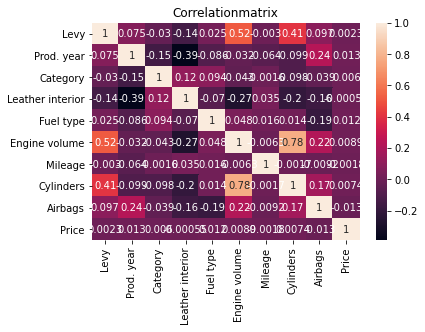

In [56]:
visual_representation(Train_data,"","","","","Correlationmatrix").heatmap()

In [57]:
from sklearn.model_selection import train_test_split
X = Train_data.iloc[:,:-1].values
y = Train_data.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
import xgboost as xgb
regressor_xgb = xgb.XGBRegressor()
regressor_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
y_pred_xgb = regressor_xgb.predict(X_test)
error_xgb_train_test = mean_squared_error(y_pred_xgb,y_test)
print(error_xgb_train_test)

95630110195.79053


In [60]:
# from sklearn.ensemble import RandomForestRegressor
# regr = RandomForestRegressor(n_estimators=100, n_jobs=2)
# regr.fit(X_train_fold_nn,y_train_fold_nn)
# y_pred_rr = regr.predict(X_test_fold_nn)
# error = mean_squared_error(y_pred_rr,y_test_fold_nn)
# -----------------------------------------------------
# regressor_cb = cb.CatBoostRegressor()
# regressor_cb.fit(X_train_fold_nn,y_train_fold_nn)
# y_pred_cb = regressor_cb.predict(X_test_fold_nn)
# error_cb = mean_squared_error(y_pred_cb,y_test_fold_nn)

In [61]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=100, n_jobs=2)
regr.fit(X_train,y_train)
y_pred_rr = regr.predict(X_test)
error = mean_squared_error(y_pred_rr,y_test)

In [62]:
error

26206221055.111805

In [63]:
 regressor_cb = cb.CatBoostRegressor()
regressor_cb.fit(X_train,y_train)
y_pred_cb = regressor_cb.predict(X_test)
error_cb = mean_squared_error(y_pred_cb,y_test)

Learning rate set to 0.061341
0:	learn: 230799.4216499	total: 186ms	remaining: 3m 5s
1:	learn: 227279.5558181	total: 199ms	remaining: 1m 39s
2:	learn: 223813.0464583	total: 212ms	remaining: 1m 10s
3:	learn: 220403.5000213	total: 224ms	remaining: 55.8s
4:	learn: 217045.9381423	total: 234ms	remaining: 46.6s
5:	learn: 214860.7500435	total: 241ms	remaining: 40s
6:	learn: 211588.3948365	total: 249ms	remaining: 35.3s
7:	learn: 208369.0738464	total: 256ms	remaining: 31.8s
8:	learn: 205200.6111990	total: 261ms	remaining: 28.8s
9:	learn: 202074.0692660	total: 267ms	remaining: 26.4s
10:	learn: 199002.7573970	total: 272ms	remaining: 24.5s
11:	learn: 195978.0800606	total: 277ms	remaining: 22.8s
12:	learn: 192992.1446603	total: 283ms	remaining: 21.4s
13:	learn: 190052.3323067	total: 289ms	remaining: 20.3s
14:	learn: 189858.2071690	total: 293ms	remaining: 19.3s
15:	learn: 186975.0265799	total: 298ms	remaining: 18.3s
16:	learn: 184137.4744578	total: 307ms	remaining: 17.8s
17:	learn: 181343.4351683	to

In [64]:
error_cb

22608886870.902126

--------------------

In [97]:
Test_data = pd.read_csv("test.csv")

In [98]:
Test_data[Test_data.duplicated("ID")]

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
1137,45815375,-,LEXUS,RX 300,2002,Jeep,Yes,Petrol,3.0 Turbo,201000 km,6,Automatic,4x4,04-May,Left wheel,Silver,8,NaN
1157,45813894,1172,MERCEDES-BENZ,E 350,2011,Sedan,Yes,Petrol,3.5,121245 km,6,Automatic,Rear,04-May,Left wheel,Silver,12,NaN
1931,45815239,1053,MERCEDES-BENZ,GLK 350,2014,Jeep,Yes,Petrol,3.5,156768 km,6,Automatic,4x4,04-May,Left wheel,White,12,NaN
2076,45793611,1341,FORD,Focus,2006,Hatchback,No,Petrol,1.8,0 km,4,Manual,Front,04-May,Left wheel,Sky blue,8,NaN
2197,45815359,1493,LEXUS,RX 350,2016,Jeep,Yes,Petrol,3.5,65981 km,6,Automatic,Front,04-May,Left wheel,Black,12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7916,45815355,1172,LEXUS,IS 350,2011,Sedan,Yes,Petrol,3.5,259066 km,6,Automatic,4x4,04-May,Left wheel,Silver,12,NaN
8005,45681968,-,MERCEDES-BENZ,CLS 500,2005,Sedan,Yes,CNG,5,194000 km,8,Automatic,Rear,04-May,Left wheel,Black,8,NaN
8011,45815373,-,INFINITI,EX37,2012,Hatchback,Yes,Petrol,3.3,52000 km,6,Automatic,4x4,04-May,Left wheel,Black,2,NaN
8148,45815386,1363,LEXUS,GX 460,2012,Jeep,Yes,Petrol,4.6,150909 km,8,Automatic,4x4,04-May,Left wheel,Black,12,NaN


In [99]:
## Changing the Levy, Engine and Mileage values 


print(Data.Correct_data_type("Levy",Test_data))



0          0
1          0
2          0
3        975
4          0
        ... 
8240    1357
8241       0
8242    1646
8243     784
8244     448
Name: Levy, Length: 8245, dtype: int64


In [100]:
print(Data.Correct_data_type("Engine volume",Test_data))


0       2.0
1       2.4
2       1.5
3       3.2
4       1.6
       ... 
8240    1.6
8241    2.8
8242    4.6
8243    1.5
8244    1.3
Name: Engine volume, Length: 8245, dtype: float64


In [101]:
print(Data.Correct_data_type("Mileage",Test_data))


0            0
1        26000
2       168000
3       143000
4       200000
         ...  
8240    164000
8241    156000
8242    102907
8243      3000
8244    321269
Name: Mileage, Length: 8245, dtype: int64


In [102]:
Test_data["Levy"] = Test_data["Levy"].replace(0,np.median(Test_data["Levy"]))

In [103]:
# Test_data[""] = Test_data["Levy"].replace(0,np.median(Test_data["Levy"]))

In [104]:
ID = Test_data["ID"]

In [105]:
Test_data= Test_data[[col for col in Test_data.columns if col !="Price"]+["Price"]]
Test_data.drop(["ID","Model","Manufacturer","Gear box type","Drive wheels","Doors","Wheel","Color"],axis =1,inplace= True )



In [106]:
Label_encoding.label_encoding(Test_data,'Fuel type')
Label_encoding.label_encoding(Test_data,'Leather interior')
Label_encoding.label_encoding(Test_data,'Category')

0       0
1       1
2       1
3       2
4       0
       ..
8240    4
8241    1
8242    2
8243    0
8244    0
Name: Category, Length: 8245, dtype: int64

In [107]:
Test_data

,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Airbags,Price
0,645.0,2012,0,0,0,2.0,0,4,10,NaN
1,645.0,2012,1,1,1,2.4,26000,4,10,NaN
2,645.0,2005,1,0,1,1.5,168000,4,8,NaN
3,975.0,2012,2,1,1,3.2,143000,6,12,NaN
4,645.0,1993,0,0,1,1.6,200000,4,0,NaN
...,...,...,...,...,...,...,...,...,...,...
8240,1357.0,2004,4,0,1,1.6,164000,4,6,NaN
8241,645.0,2012,1,1,1,2.8,156000,4,6,NaN
8242,1646.0,2015,2,1,1,4.6,102907,8,0,NaN
8243,784.0,2017,0,1,1,1.5,3000,4,4,NaN


In [108]:
Test_data["Mileage"] = Test_data["Mileage"].replace(0,np.mean(Test_data["Mileage"]))

In [109]:
Test_data.drop(["Price"],axis = 1 ,inplace = True)

In [110]:
Test_data

,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Airbags
0,645.0,2012,0,0,0,2.0,1.318247e+06,4,10
1,645.0,2012,1,1,1,2.4,2.600000e+04,4,10
2,645.0,2005,1,0,1,1.5,1.680000e+05,4,8
3,975.0,2012,2,1,1,3.2,1.430000e+05,6,12
4,645.0,1993,0,0,1,1.6,2.000000e+05,4,0
...,...,...,...,...,...,...,...,...,...
8240,1357.0,2004,4,0,1,1.6,1.640000e+05,4,6
8241,645.0,2012,1,1,1,2.8,1.560000e+05,4,6
8242,1646.0,2015,2,1,1,4.6,1.029070e+05,8,0
8243,784.0,2017,0,1,1,1.5,3.000000e+03,4,4


In [111]:
X_pre = Test_data.iloc[:,:].values

In [112]:
regr.predict(X_pre)

array([ 9396.14     , 19687.25     ,  6727.58     , ..., 10414.5822906,
       42210.25     , 15046.44     ])

In [113]:
regressor_cb.predict(X_pre)

array([12545.06410482, 18292.21952062,  8149.5830244 , ...,
       13286.19087089, 36692.95817031, 15724.06236265])

In [114]:
df = pd.DataFrame()

In [115]:
df["ID"] = ID

In [117]:
df["Price"] =pd.Series(regr.predict(X_pre))
df["Price1"] =pd.Series(regressor_cb.predict(X_pre))
# df[]


In [118]:
df["Price1"] = df["Price1"].abs()

In [119]:
# Output["Price"] = Output["Price"].abs()
df.to_csv("submission9.csv",index=False)

----------------

### Exp 6

In [69]:
Train_data = pd.read_csv("train.csv")

In [70]:
Train_data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [71]:
Train_data = Train_data[[col for col in Train_data.columns if col !="Price"] + ["Price"]]

In [72]:
Train_data

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,13328
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,16621
2,45774419,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,8467
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,3607
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,11726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,8467
19233,45778856,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,15681
19234,45804997,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,26108
19235,45793526,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,5331


In [73]:

print(Data.Correct_data_type("Levy",Train_data))

0        1399
1        1018
2           0
3         862
4         446
         ... 
19232       0
19233     831
19234     836
19235    1288
19236     753
Name: Levy, Length: 19237, dtype: int64


In [74]:
print(Data.Correct_data_type("Engine volume",Train_data))


0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 19237, dtype: float64


In [75]:
print(Data.Correct_data_type("Mileage",Train_data))


0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 19237, dtype: int64


In [76]:
Train_data.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,13328
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,16621
2,45774419,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,8467
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,3607
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,11726


In [77]:
Train_data[Train_data["Mileage"] == 0]

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
11,45814819,0,FORD,Transit,1999,Microbus,No,CNG,4.0,0,8.0,Manual,Rear,02-Mar,Left wheel,Blue,0,8781
24,45813492,0,OPEL,Vectra,1995,Sedan,No,Petrol,1.8,0,4.0,Automatic,Front,04-May,Left wheel,Green,4,4704
26,45759112,2455,LEXUS,GX 470,2008,Jeep,Yes,Petrol,4.7,0,8.0,Automatic,4x4,04-May,Left wheel,White,0,549
83,45765301,0,HONDA,Cr-v,1998,Jeep,No,Petrol,2.0,0,4.0,Automatic,4x4,04-May,Right-hand drive,White,2,8154
97,45749534,0,HONDA,Civic,1997,Hatchback,Yes,Petrol,1.4,0,4.0,Manual,Front,02-Mar,Left wheel,Blue,6,4234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19064,45791823,0,BMW,320,1994,Sedan,Yes,Petrol,2.0,0,6.0,Manual,Rear,04-May,Left wheel,Green,2,2900
19088,45782030,0,PEUGEOT,406,2001,Sedan,No,Petrol,2.0,0,4.0,Manual,Front,04-May,Left wheel,White,2,2200
19103,45748748,0,NISSAN,Tiida,2006,Hatchback,No,Petrol,1.5,0,4.0,Automatic,Front,04-May,Right-hand drive,Black,4,30
19218,45748699,0,NISSAN,Note,2006,Hatchback,No,Petrol,1.3,0,4.0,Automatic,Front,04-May,Right-hand drive,Green,9,30


In [78]:
Train_data["Mileage"] = Train_data["Mileage"].replace(0,np.mean(Train_data["Mileage"]))

In [79]:
Train_data

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,13328
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,16621
2,45774419,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2,8467
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0,3607
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4,11726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,8467
19233,45778856,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,15681
19234,45804997,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,04-May,Left wheel,Grey,4,26108
19235,45793526,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258.0,4.0,Automatic,Front,04-May,Left wheel,Black,4,5331


In [80]:
Train_data[Train_data["Mileage"] == 0]

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price


In [81]:
Train_data.drop_duplicates(["ID"],keep = "first",inplace = True)

In [82]:
Train_data

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,13328
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,16621
2,45774419,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2,8467
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0,3607
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4,11726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,8467
19233,45778856,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,15681
19234,45804997,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,04-May,Left wheel,Grey,4,26108
19235,45793526,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258.0,4.0,Automatic,Front,04-May,Left wheel,Black,4,5331


In [83]:
Train_data.drop(["ID","Manufacturer","Model","Engine volume","Gear box type","Drive wheels","Doors","Wheel","Color"],axis = 1,inplace = True)

In [84]:
Train_data

,Levy,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Airbags,Price
0,1399,2010,Jeep,Yes,Hybrid,186005.0,6.0,12,13328
1,1018,2011,Jeep,No,Petrol,192000.0,6.0,8,16621
2,0,2006,Hatchback,No,Petrol,200000.0,4.0,2,8467
3,862,2011,Jeep,Yes,Hybrid,168966.0,4.0,0,3607
4,446,2014,Hatchback,Yes,Petrol,91901.0,4.0,4,11726
...,...,...,...,...,...,...,...,...,...
19232,0,1999,Coupe,Yes,CNG,300000.0,4.0,5,8467
19233,831,2011,Sedan,Yes,Petrol,161600.0,4.0,8,15681
19234,836,2010,Jeep,Yes,Diesel,116365.0,4.0,4,26108
19235,1288,2007,Jeep,Yes,Diesel,51258.0,4.0,4,5331


In [85]:
Label_encoding.label_encoding(Train_data,'Fuel type')
Label_encoding.label_encoding(Train_data,'Leather interior')
Label_encoding.label_encoding(Train_data,'Category')

0        0
1        0
2        1
3        0
4        1
        ..
19232    6
19233    2
19234    0
19235    0
19236    2
Name: Category, Length: 18924, dtype: int64

In [86]:
Train_data.drop(["Category"],axis = 1,inplace = True)


In [95]:
X_fold_nn = Train_data.iloc[:,:-1].values
y_fold_nn = Train_data.iloc[:,-1].values
kf = KFold(n_splits = 5,random_state = 42,shuffle = True)
for train_index,test_index in kf.split(X_fold_nn):
    X_train_fold_nn,X_test_fold_nn = X_fold_nn[train_index],X_fold_nn[test_index]
    y_train_fold_nn,y_test_fold_nn = y_fold_nn[train_index],y_fold_nn[test_index]

In [96]:
import xgboost as xgb
regressor_xgb = xgb.XGBRegressor()
regressor_xgb.fit(X_train_fold_nn,y_train_fold_nn)
y_pred_xgb = regressor_xgb.predict(X_test_fold_nn)
error_xgb = mean_squared_error(y_pred_xgb,y_test_fold_nn)
print(error_xgb)

182968479745.19418


In [ ]:
#256075237018.9404

-------

In [93]:
from sklearn.model_selection import train_test_split
X = Train_data.iloc[:,:-1].values
y = Train_data.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [94]:
import xgboost as xgb
regressor_xgb = xgb.XGBRegressor()
regressor_xgb.fit(X_train,y_train)
y_pred_xgb = regressor_xgb.predict(X_test)
error_xgb_train_test = mean_squared_error(y_pred_xgb,y_test)
print(error_xgb_train_test)

189793251165.94827


-----------------------

In [113]:
Train_data = pd.read_csv("train.csv")

In [114]:
Train_data = Train_data[[col for col in Train_data.columns if col !="Price"] + ["Price"]]

In [115]:

print(Data.Correct_data_type("Levy",Train_data))
print(Data.Correct_data_type("Engine volume",Train_data))
print(Data.Correct_data_type("Mileage",Train_data))



0        1399
1        1018
2           0
3         862
4         446
         ... 
19232       0
19233     831
19234     836
19235    1288
19236     753
Name: Levy, Length: 19237, dtype: int64
0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 19237, dtype: float64
0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 19237, dtype: int64


In [116]:
Train_data["Mileage"] = Train_data["Mileage"].replace(0,np.mean(Train_data["Mileage"]))

In [117]:
Train_data.drop_duplicates(["ID"],keep = "first",inplace = True)

In [118]:
Train_data.drop(["ID","Manufacturer","Model","Engine volume","Gear box type","Drive wheels","Doors","Wheel","Color"],axis = 1,inplace = True)

In [119]:
Train_data.drop(["Levy","Mileage"],axis = 1,inplace = True)

In [127]:
Train_data.drop(["Category","Leather interior","Fuel type"],axis = 1,inplace = True)

In [129]:
# Label_encoding.label_encoding(Train_data,'Fuel type')
# Label_encoding.label_encoding(Train_data,'Leather interior')
# Label_encoding.label_encoding(Train_data,'Category')

In [130]:
Train_data["Cars_age"] = 2021 - Train_data["Prod. year"]

In [131]:
Train_data

,Prod. year,Cylinders,Airbags,Cars_age,Price
0,2010,6.0,12,11,13328
1,2011,6.0,8,10,16621
2,2006,4.0,2,15,8467
3,2011,4.0,0,10,3607
4,2014,4.0,4,7,11726
...,...,...,...,...,...
19232,1999,4.0,5,22,8467
19233,2011,4.0,8,10,15681
19234,2010,4.0,4,11,26108
19235,2007,4.0,4,14,5331


In [132]:
Train_data = Train_data[[col for col in Train_data.columns if col !="Price"] + ["Price"]]

In [133]:
Train_data

,Prod. year,Cylinders,Airbags,Cars_age,Price
0,2010,6.0,12,11,13328
1,2011,6.0,8,10,16621
2,2006,4.0,2,15,8467
3,2011,4.0,0,10,3607
4,2014,4.0,4,7,11726
...,...,...,...,...,...
19232,1999,4.0,5,22,8467
19233,2011,4.0,8,10,15681
19234,2010,4.0,4,11,26108
19235,2007,4.0,4,14,5331


In [134]:
X_fold_nn = Train_data.iloc[:,:-1].values
y_fold_nn = Train_data.iloc[:,-1].values
kf = KFold(n_splits = 5,random_state = 42,shuffle = True)
for train_index,test_index in kf.split(X_fold_nn):
    X_train_fold_nn,X_test_fold_nn = X_fold_nn[train_index],X_fold_nn[test_index]
    y_train_fold_nn,y_test_fold_nn = y_fold_nn[train_index],y_fold_nn[test_index]

In [135]:
import xgboost as xgb
regressor_xgb = xgb.XGBRegressor()
regressor_xgb.fit(X_train_fold_nn,y_train_fold_nn)
y_pred_xgb = regressor_xgb.predict(X_test_fold_nn)
error_xgb = mean_squared_error(y_pred_xgb,y_test_fold_nn)
print(error_xgb)

182990926148.91425


In [ ]:
189793251165.94827

182949338875.58786

In [111]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=100, n_jobs=2)
regr.fit(X_train_fold_nn,y_train_fold_nn)
y_pred_rr = regr.predict(X_test_fold_nn)
error = mean_squared_error(y_pred_rr,y_test_fold_nn)

In [112]:
print(error)

182941846765.63034
